In [1]:
%matplotlib inline

In [2]:
import numpy as np

from dataprovider3 import Dataset
from dataprovider3 import emio

In [18]:
import os

def load_data():
    data_dir = '~/Data_local/datasets/Superhuman'
    data_dir = os.path.expanduser(data_dir)

    # Image
    fname = os.path.join(data_dir, 'train_img.h5')
    img = emio.imread(fname)
    img = (img/255.0).astype(np.float32)

    # Segmentation
    fname = os.path.join(data_dir, 'train_seg.h5')
    seg = emio.imread(fname)

    # Mask
    fname = os.path.join(data_dir, 'train_msk.h5')
    msk = emio.imread(fname)
    
    return img, seg, msk

In [30]:
import matplotlib.pyplot as plt

def plot_data(img, seg, msk):
    sz = 10
    fig = plt.figure(figsize=(sz,sz))

    plt.subplot(131)
    z = img.shape[-3]//2
    plt.imshow(img[z,:,:], cmap='gray')

    plt.subplot(132)
    z = img.shape[-3]//2
    plt.imshow(seg[z,:,:])

    plt.subplot(133)
    z = img.shape[-3]//2
    plt.imshow(msk[z,:,:], cmap='gray')
    plt.show()

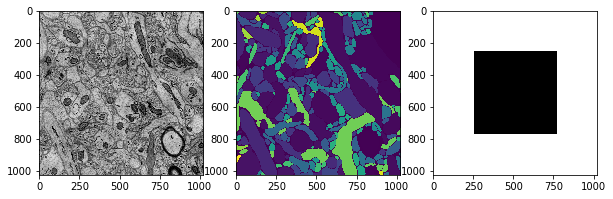

In [31]:
img, seg, msk = load_data()
plot_data(img, seg, msk)

In [6]:
# Create Dataset.
dset = Dataset()
dset.add_data('img', img)
dset.add_data('seg', seg)
dset.add_mask('msk', msk, loc=True)

In [8]:
# Without a default spec, spec should be provided dynamically.
try:
    sample = dset.random_sample()
except Dataset.NoSpecError:
    print("no spec")

no spec


In [9]:
spec = dict(img=(32,160,160), seg=(32,160,160))
sample = dset.random_sample(spec=spec)

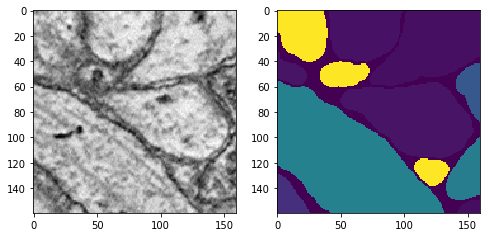

In [11]:
sz = 8
fig = plt.figure(figsize=(sz,sz))

plt.subplot(121)
plt.imshow(sample['img'][0,0,:,:], cmap='gray')

plt.subplot(122)
plt.imshow(sample['seg'][0,0,:,:])
plt.show()

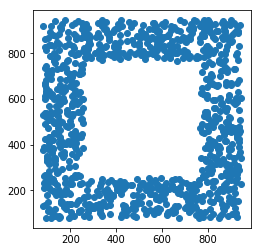

In [12]:
# Fixing random state for reproducibility
np.random.seed(19680801)

xs, ys, zs = [], [], []
for _ in range(1000):
    loc = dset._random_location(spec=spec)
    xs.append(loc[2])
    ys.append(loc[1])
    zs.append(loc[0])

fig = plt.figure()
ax = fig.add_subplot(111)
    
ax.scatter(xs, ys)
ax.set_aspect('equal')

plt.show()

# Border mirroring

fov: (109, 109, 109)
before padding: (100, 1024, 1024)
after padding: (208, 1132, 1132)


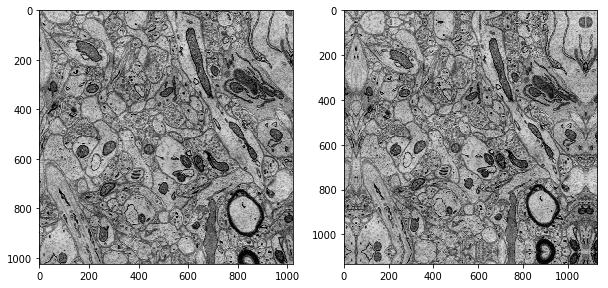

In [49]:
img, seg, msk = load_data()

sz = 10
fig = plt.figure(figsize=(sz,sz))

fov = (109,109,109)
offset = tuple(x//2 for x in fov)
pad_width = [(x,x) for x in offset]

print('fov: {}'.format(fov))
print('before padding: {}'.format(img.shape))
plt.subplot(121)
z = img.shape[-3]//2
plt.imshow(img[z,:,:], cmap='gray')

img = np.pad(img, pad_width, mode='reflect')
print('after padding: {}'.format(img.shape))

plt.subplot(122)
z = img.shape[-3]//2
plt.imshow(img[z,:,:], cmap='gray')
plt.show()

In [61]:
# Create Dataset.
dset = Dataset()
dset.add_data('img', img)
dset.add_data('seg', seg, offset=offset)
dset.add_mask('msk', msk, loc=True, offset=offset)

In [62]:
spec = dict(img=(32,160,160), seg=(32,160,160))
sample = dset.random_sample(spec=spec)

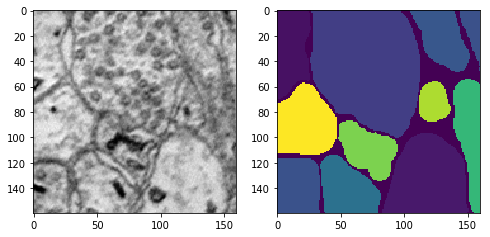

In [63]:
sz = 8
fig = plt.figure(figsize=(sz,sz))

plt.subplot(121)
plt.imshow(sample['img'][0,0,:,:], cmap='gray')

plt.subplot(122)
plt.imshow(sample['seg'][0,0,:,:])
plt.show()

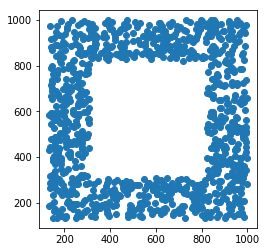

In [64]:
# Fixing random state for reproducibility
np.random.seed(19680801)

xs, ys, zs = [], [], []
for _ in range(1000):
    loc = dset._random_location(spec=spec)
    xs.append(loc[2])
    ys.append(loc[1])
    zs.append(loc[0])

fig = plt.figure()
ax = fig.add_subplot(111)
    
ax.scatter(xs, ys)
ax.set_aspect('equal')

plt.show()